TP DE MACHINE LEARNING !!!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('WineQT.csv')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

VISUALISATION DES DONNEES

In [4]:
import numpy as np
import matplotlib.pyplot as plt


x=[]

Oui = df['quality']
d= [df['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid']]

xinit=np.transpose(np.matrix(d))
print(xinit)
y=[]
y_simpl=[]

for loop in range(len(xinit)):
    if loop%10==0:
        x.append([xinit[loop,0],xinit[loop,1],xinit[loop,2],xinit[loop,3]])
        #si la qualité >5
        if(Oui[loop]>6 ):
            y.append(1)
        else:
            y.append(0)
        
x=np.array(x)
print(x[0,2])

print(y) 

[[ 0.7    9.4    0.56   0.   ]
 [ 0.88   9.8    0.68   0.   ]
 [ 0.76   9.8    0.65   0.04 ]
 ...
 [ 0.6   10.5    0.58   0.08 ]
 [ 0.55  11.2    0.76   0.1  ]
 [ 0.645 10.2    0.71   0.12 ]]
0.56
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [5]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best',idx=0,idy=1 ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos=[]
    neg=[]
    idpos=[]
    idneg=[]
    for loop in range(len(y)):
        if(y[loop]==1):
            idpos.append(X[loop,idx])
            pos.append(X[loop,idy])
        else:
            idneg.append(X[loop,idx])
            neg.append(X[loop,idy])

    # Plot examples
    ax.scatter(idpos, pos, marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(idneg, neg, marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

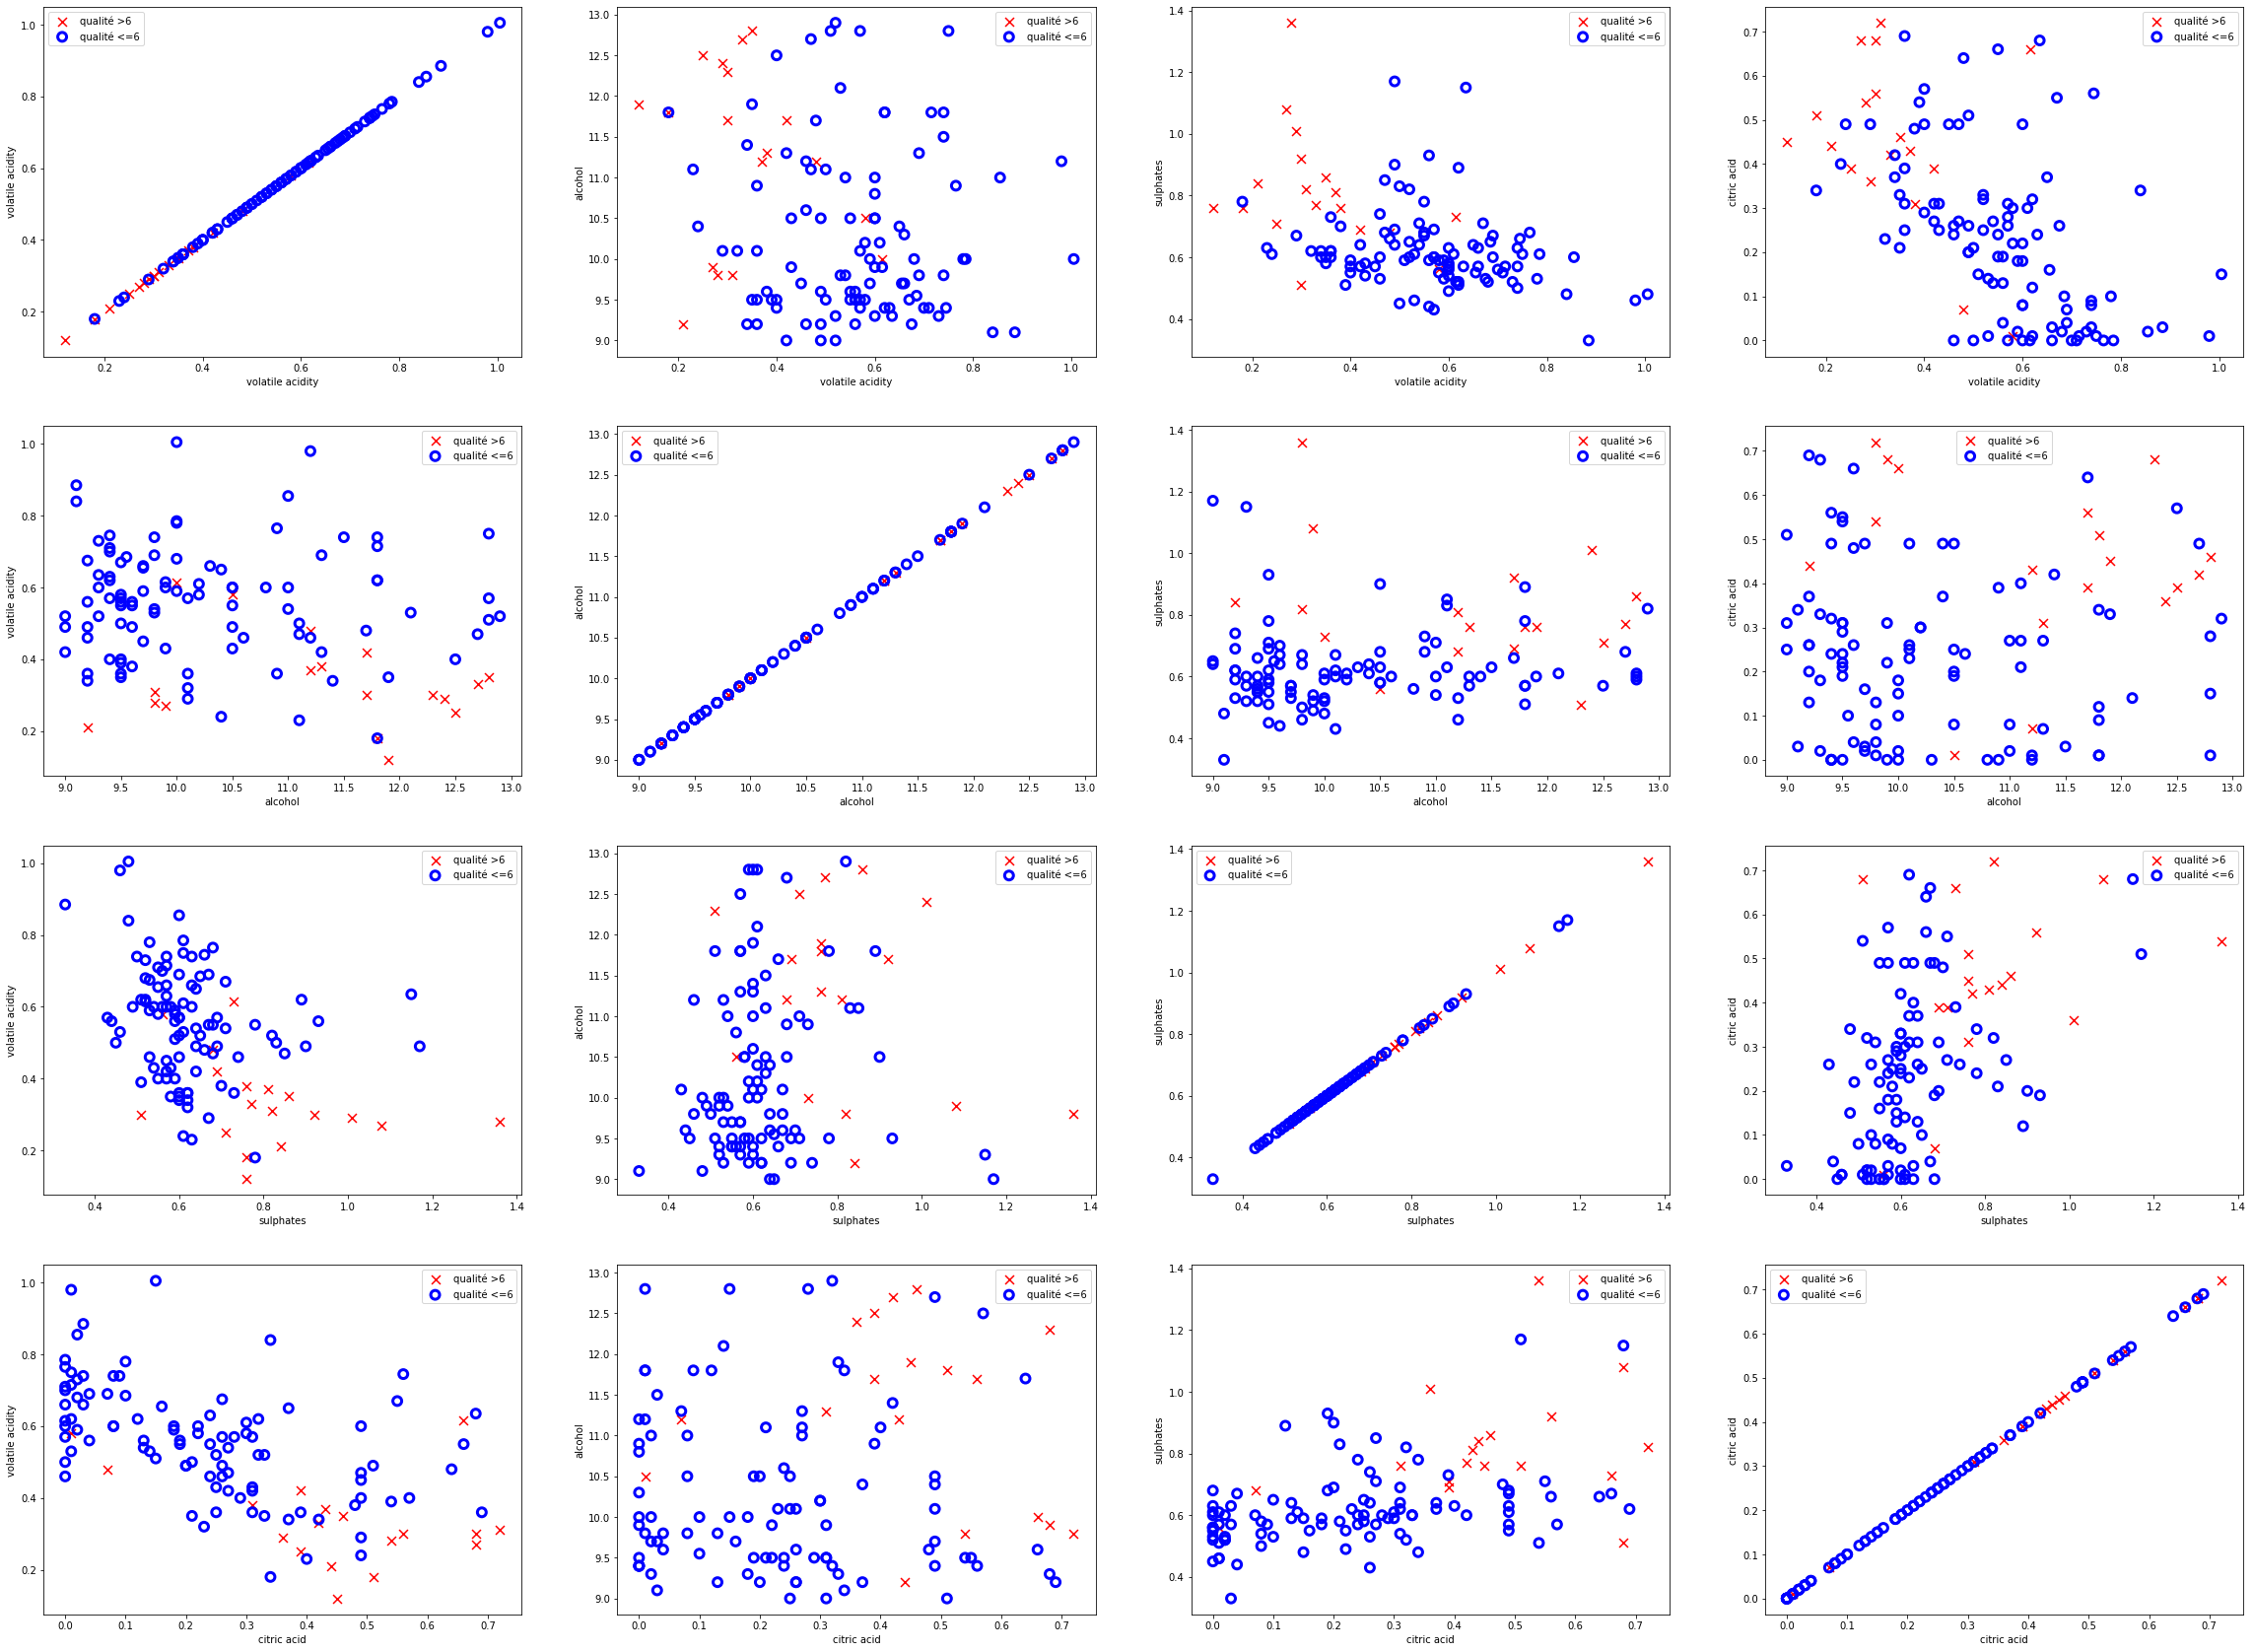

In [6]:

#[df['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid']]
name=['volatile acidity','alcohol','sulphates','citric acid']

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(40, 30))
for i in range(4):
    for j in range(4):
        plot_data(x, y, ax[i,j],"qualité >6", "qualité <=6", 80, 'best',i,j)
        ax[i,j].set_ylabel(name[j])
        ax[i,j].set_xlabel(name[i])

plt.show()

LOGISTIC REGRESSION


In [7]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

, Logistic Loss

In [8]:
import copy
import math


def compute_cost_logistic(X, y, w, b):
    m, n = X.shape

   ### START CODE HERE ###
    loss_sum = 0 

   # Loop over each training example
    for i in range(m): 

       # First calculate z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
        z_wb = 0 
       # Loop over each feature
        for j in range(n): 
           # Add the corresponding term to z_wb
             z_wb_ij = z_wb_ij = w[j]*X[i][j]
             z_wb += z_wb_ij # equivalent to z_wb = z_wb + z_wb_ij
       # Add the bias term to z_wb
        z_wb += b # equivalent to z_wb = z_wb + b

        f_wb = f_wb = sigmoid(z_wb)
        loss =  -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)

        loss_sum += loss # equivalent to loss_sum = loss_sum + loss

    total_cost = (1 / m) * loss_sum  
   ### END CODE HERE ### 

    return total_cost


def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw 

def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing 

TEST GRADIENT DESCENT

In [9]:
def map_feature(X1, X2):
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [10]:
#[df['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid']]
X_train=np.copy(x)
y_train=np.copy(y)
print("Original shape of data:", X_train.shape)
print("Original shape of y:", y_train.shape)
X_mapped = map_feature(X_train[:, 0], X_train[:, 2])
print("Shape after feature mapping:", X_mapped.shape)
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", X_mapped[0])

np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_logistic(X_mapped, y_train, initial_w, initial_b)

print(" cost :", cost)


Original shape of data: (115, 4)
Original shape of y: (115,)
Shape after feature mapping: (115, 27)
X_train[0]: [0.7  9.4  0.56 0.  ]
mapped X_train[0]: [0.7        0.56       0.49       0.392      0.3136     0.343
 0.2744     0.21952    0.175616   0.2401     0.19208    0.153664
 0.1229312  0.09834496 0.16807    0.134456   0.1075648  0.08605184
 0.06884147 0.05507318 0.117649   0.0941192  0.07529536 0.06023629
 0.04818903 0.03855122 0.03084098]
 cost : 0.7108552319121286


In [11]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)                 
    sigma  = np.std(X, axis=0)                  
    X_norm = np.array((X - mu) / sigma)
    print(X_norm)
    return (X_norm, mu, sigma)

In [12]:
X_mapped, mu, sigma = zscore_normalize_features(map_feature(X_train[:, 0], X_train[:, 1]))
X_mapped2 = map_feature(X_train[:, 0], X_train[:, 1])
print( X_mapped)
#print(X_mapped2)
#print(X_train)

np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_logistic(X_mapped, y_train, initial_w, initial_b)

print(f"dj_db: {dj_db}", )
print(f"First few elements of dj_dw:\n {dj_dw[:4].tolist()}", )

[[ 1.02289134 -0.93588038  0.98705658 ...  0.06129926 -0.42068712
  -0.78331282]
 [ 0.52827037 -0.48271725  0.39282091 ... -0.00858036 -0.25672982
  -0.54950228]
 [ 1.08108205 -0.93588038  1.0620172  ...  0.10127076 -0.40376943
  -0.78331282]
 ...
 [ 0.20822151 -1.11714563  0.04925141 ... -0.5120496  -0.75412267
  -0.86091946]
 [-1.01378323  1.32993528 -0.96670418 ... -0.43582433  0.32040254
   1.21448716]
 [ 0.44098432  0.06107851  0.29593032 ...  0.26105675  0.16029768
  -0.1790863 ]]
[[ 1.02289134 -0.93588038  0.98705658 ...  0.06129926 -0.42068712
  -0.78331282]
 [ 0.52827037 -0.48271725  0.39282091 ... -0.00858036 -0.25672982
  -0.54950228]
 [ 1.08108205 -0.93588038  1.0620172  ...  0.10127076 -0.40376943
  -0.78331282]
 ...
 [ 0.20822151 -1.11714563  0.04925141 ... -0.5120496  -0.75412267
  -0.86091946]
 [-1.01378323  1.32993528 -0.96670418 ... -0.43582433  0.32040254
   1.21448716]
 [ 0.44098432  0.06107851  0.29593032 ...  0.26105675  0.16029768
  -0.1790863 ]]
dj_db: 0.4438731

GRADIENT DESCENT APPLICATION

In [13]:

np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history = gradient_descent(X_mapped, y_train, initial_w, initial_b, alpha, iterations)

Iteration    0: Cost 1.1643857547269119   
Iteration 1000: Cost 0.3250591899924112   
Iteration 2000: Cost 0.2879509934719865   
Iteration 3000: Cost 0.28047485352542895   
Iteration 4000: Cost 0.2781076002414587   
Iteration 5000: Cost 0.2771558328016605   
Iteration 6000: Cost 0.27669382536126486   
Iteration 7000: Cost 0.27642715217312114   
Iteration 8000: Cost 0.27624802684428224   
Iteration 9000: Cost 0.27611284107318446   


In [22]:
def sig(z):
 
    return 1/(1+np.exp(-z))
def plot_decision_boundary(w, b, X, y,muX=0,sigmaX=1):
    # Credit to dibgerge on Github for this plotting code
    fig,ax = plt.subplots(1, 2, figsize=(8,4))
    
    #ici = 27

    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        ax.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-3, 3, 50)
        #print(u)
        v = np.linspace(-3, 3, 50)
        z = np.zeros((len(u), len(v)))
        res=np.zeros((len(u), len(v)))
        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                x1=(u[i])*sigmaX[0]+muX[0]
                x2=(v[j])*sigmaX[1]+muX[1]
                mpuv=(map_feature(x1, x2))
                norm_mpuv = np.array((mpuv - muX) / sigmaX)
                z[i,j] = sig(np.dot(norm_mpuv, w) + b)
                if(z[i,j]>0.5):
                    res[i,j]=1

                #-0.57334988  2.61790651

                #norm_test = np.array((test - muX) / sigmaX)
                #-0.57334988  2.61790651 -0.58659709  1.33972533  2.90471807 -0.59585977
                #0.61625532  2.01051979  3.17868042 -0.60122932  0.21496111  1.30483865
                #2.41765617  3.43151683 -0.60290999 -0.02748489  0.79940736  1.7548985
                #2.72363895  3.65728241 -0.60120403 -0.18379606  0.44250777  1.22395537
                #2.08418899  2.96917743  3.85299494]
                #gg = sig(np.dot(norm_test, w) + b)
                #print("normtest = ",norm_test)
                #print("gg = ",gg)
        # import#ant to transpose z before calling contour       
        z = z.T
        #print(res)
        res= res.T
        # Plot z = 0.5
        xres,yres = np.meshgrid(u, v)
        print(res.shape)
        ax[0].scatter(xres, yres, c=res)
        plot_data(X[:, 0:2], y,ax[1])
        plot_data(X[:, 0:2], y,ax[0])
        
        #ax.contour(u,v,z, levels = [0.5], colors="g")
    

(50, 50)


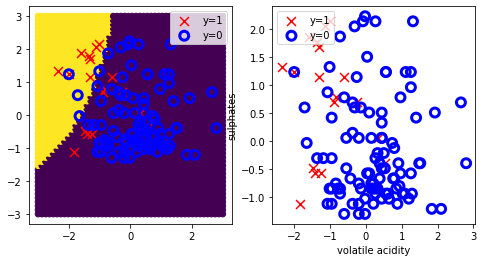

In [23]:
#[df['volatile acidity'],df['alcohol'],df['sulphates'],df['citric acid']]
plot_decision_boundary(w, b, X_mapped, y_train,mu,sigma)
# Set the y-axis label
plt.ylabel('sulphates') 
# Set the x-axis label
plt.xlabel('volatile acidity') 
plt.legend(loc="upper left")
plt.show()

PREDICT

In [24]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += X[i,j]*w[j]
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)
        #print(f_wb)
        # Apply the threshold
        if(f_wb>=0.5):
            p[i] = 1.
        else:
            p[i] = 0.
        
    ### END CODE HERE ### 
    return p

In [25]:

#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 87.826087


In [ ]:
REGULARIZATION LAMBDA

In [26]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    n = X.shape[1]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        #cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
        if(y[i]==1):
                cost +=  -np.log(f_wb_i)
        elif(y[i]==0):
                cost +=  -np.log(1-f_wb_i)
             
    cost = cost / m
    
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost  
    
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost 
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    m, n = X.shape

    dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

  ### START CODE HERE ###     
  # Loop over the elements of w
    for j in range(n): 

        dj_dw_j_reg = (lambda_ / m) * w[j]

      # Add the regularization term  to the correspoding element of dj_dw
        dj_dw[j] = dj_dw[j] + dj_dw_j_reg

  ### END CODE HERE ###         

    return dj_db, dj_dw

def gradient_descent_reg(X, y, w_in, b_in, alpha, num_iters,lambda_=0): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_reg(X, y, w, b,lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_reg(X, y, w, b,lambda_) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing

In [27]:
# Initialize fitting parameters
np.random.seed(1)
initial_w2 = np.random.rand(X_mapped.shape[1])-0.5
initial_b2 = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 1    

# Some gradient descent settings
iterations2 = 10000
alpha2 = 0.2

w2,b2, J_history2 = gradient_descent_reg(X_mapped, y_train, initial_w2, initial_b2, 
                                    alpha2, iterations2, lambda_)

Iteration    0: Cost 1.070736282090114   
Iteration 1000: Cost 0.2789579813118528   
Iteration 2000: Cost 0.278686296104307   
Iteration 3000: Cost 0.27867827420326574   
Iteration 4000: Cost 0.2786780299266058   
Iteration 5000: Cost 0.27867802243966233   
Iteration 6000: Cost 0.27867802220982807   
Iteration 7000: Cost 0.2786780222027699   
Iteration 8000: Cost 0.278678022202553   
Iteration 9000: Cost 0.2786780222025464   


(50, 50)


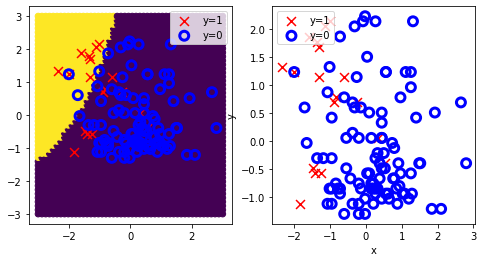

In [29]:

plot_decision_boundary(w2, b2, X_mapped, y_train,mu,sigma)
# Set the y-axis label
plt.ylabel('y') 
# Set the x-axis label
plt.xlabel('x') 
plt.legend(loc="upper left")
plt.show()

In [30]:
#Compute accuracy on the training set
p = predict(X_mapped, w2, b2)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 88.695652
